## 0. Importing Modules

In [1]:
##### some basic modules
import os
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

##### Image-related modules
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
import cv2 

##### keras module
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam


C:\Users\dabsdamoon\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
##### Import custom function

from alpha_model import model
from data_preprocessing import rgb_lab_transformation, feature_label_generation, data_generation
from visualization import visualize_validation_image

## 1. Uploading and Preprocessing Dataset

##### Uploading

In [3]:
size_row = 128
size_col = 128

dir_name = 'C:/Users/dabsdamoon/Desktop/Neowiz Project/education/anime_face/data/' # name of directory where image data is located

In [4]:
##### In this case, I use all characters for training dataset.
train_image, test_image, train_label, test_label = data_generation(dir_name = dir_name,
                                                                   image_size = (size_row, size_col))

1/173
2/173
3/173
4/173
5/173
6/173
7/173
8/173
9/173
10/173
11/173
12/173
13/173
14/173
15/173
16/173
17/173
18/173
19/173
20/173
21/173
22/173
23/173
24/173
25/173
26/173
27/173
28/173
29/173
30/173
31/173
32/173
33/173
34/173
35/173
36/173
37/173
38/173
39/173
40/173
41/173
42/173
43/173
44/173
45/173
46/173
47/173
48/173
49/173
50/173
51/173
52/173
53/173
54/173
55/173
56/173
57/173
58/173
59/173
60/173
61/173
62/173
63/173
64/173
65/173
66/173
67/173
68/173
69/173
70/173
71/173
72/173
73/173
74/173
75/173
76/173
77/173
78/173
79/173
80/173
81/173
82/173
83/173
84/173
85/173
86/173
87/173
88/173
89/173
90/173
91/173
92/173
93/173
94/173
95/173
96/173
97/173
98/173
99/173
100/173
101/173
102/173
103/173
104/173
105/173
106/173
107/173
108/173
109/173
110/173
111/173
112/173
113/173
114/173
115/173
116/173
117/173
118/173
119/173
120/173
121/173
122/173
123/173
124/173
125/173
126/173
127/173
128/173
129/173
130/173
131/173
132/173
133/173
134/173
135/173
136/173
137/173
138/173
139/

In [5]:
train_feature = train_image.reshape(train_image.shape[0], size_row, size_col, 1) 
test_feature = test_image.reshape(test_image.shape[0], size_row, size_col, 1)

x_feature = np.concatenate([train_feature, test_feature])
x_label = np.concatenate([train_label, test_label])

## 2. Defining and Fitting the Model

##### Define the model

In [6]:
# Building the neural network
input_shape = (size_row,size_col,1)
kernel_size = 4

In [7]:
K.clear_session()

In [8]:
model = model(input_shape = input_shape, kernel_size = kernel_size, optimizer = Adam(0.0002, 0.5))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 4)         40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 8)         296       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
__________

##### Define Data Generator

In [9]:
image_valid = plt.imread('C:/Users/dabsdamoon/Desktop/Neowiz Project/education/anime_face/melon_valid.png')
image_valid = cv2.resize(image_valid, (size_row, size_col))

img_gray = rgb2gray(image_valid).reshape(128, 128, 1)
img_gray3 = np.concatenate([img_gray]*3, axis = 2) # concatenating three gray images so that it can have 3 channels
img_lab3 = rgb2lab(img_gray3) # convert concatenated image to lab

In [10]:
model_loss = []
img_colorized = []

In [11]:
epochs = 100
save_interval = int(epochs/20) # later, going to visualize training process with 20 images  

In [12]:
for i in range(epochs):

    model_hist = model.fit(x=x_feature, 
                           y=x_label, 
                           batch_size= 1, 
                           epochs=1,
                           verbose = 0)
    
    model_loss.append(model_hist.history['loss'])
    
    if i % save_interval == 0:
        
        print(i, model_hist.history['loss'])
        
        valid_input = img_lab3[:,:,0].reshape(1, size_row, size_col, 1)/128
        
        pred = model.predict(valid_input)    
        pred = pred.reshape(size_row, size_col, 2)
        
        cur_pred = np.zeros((size_row, size_col, 3))             
        # Output colorizations
        cur_pred[:,:,0] = valid_input.reshape(size_row, size_col) * 128 # lab class
        cur_pred[:,:,1:] = pred*128 # lab predicted
        
        img_colorized.append(lab2rgb(cur_pred))        

0 [0.019700801814903388]
5 [0.018670777996954317]
10 [0.01798362147748777]
15 [0.017212291370688075]
20 [0.016583051490231548]
25 [0.016149821454147246]
30 [0.01581233023912363]
35 [0.015560839051589122]
40 [0.01535893295577504]
45 [0.01519848333517416]
50 [0.015057176505453329]
55 [0.014947537586699325]
60 [0.01484885693345214]
65 [0.014763223405534794]
70 [0.014675744023133137]
75 [0.014615272639652403]
80 [0.014551266420075848]
85 [0.014498061086093566]
90 [0.01443660264743181]
95 [0.014393597724122376]


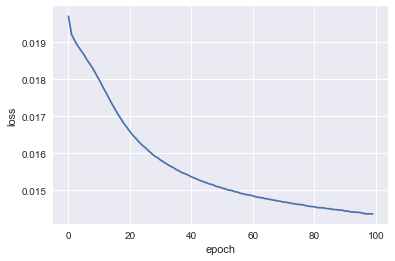

In [13]:
plt.plot(model_loss)
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

##### Visualization

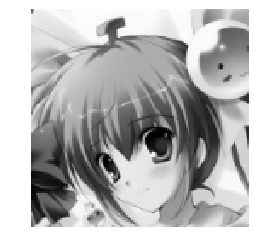

In [14]:
input_val = img_gray.copy()
plt.imshow(input_val.reshape(size_row, size_col), cmap = 'gray')
plt.axis('off')
plt.show()

In [15]:
grid_row = 4
grid_col = 5

In [16]:
g_row = []
i = 0

for r in range(grid_row):
    
    g_column = []
    
    for c in range(grid_col):
        g_column.append(img_colorized[i])
        i += 1
        
    g_column = np.concatenate(g_column, axis = 1)
    g_row.append(g_column)

g_row = np.concatenate(g_row)

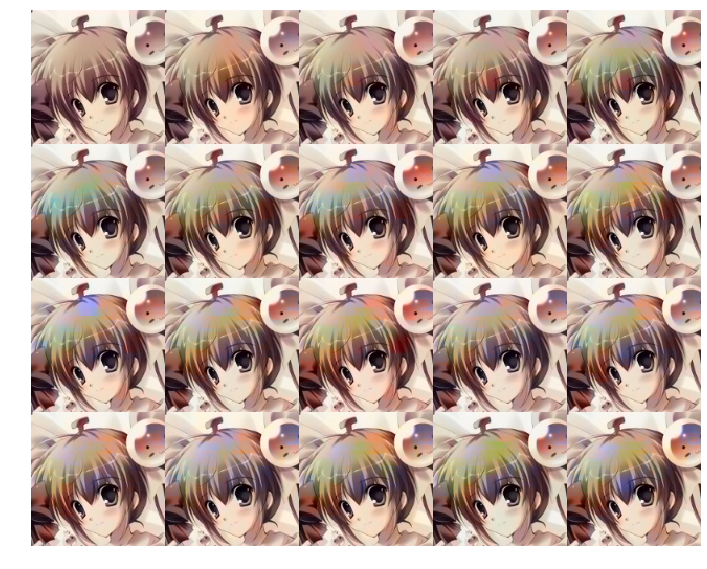

In [17]:
plt.figure(figsize = (12,12))
plt.axis('off')
plt.imshow(g_row)

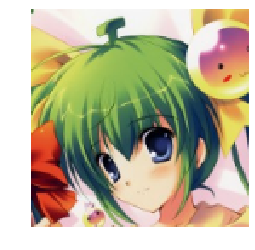

In [18]:
##### original image
plt.imshow(image_valid)
plt.axis('off')
plt.show()

##### Test with different image (same character)

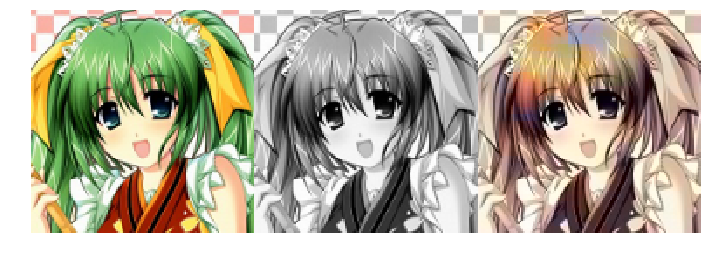

In [19]:
image_valid = plt.imread('C:/Users/dabsdamoon/Desktop/Neowiz Project/education/anime_face/melon_valid2.png')
visualize_validation_image(image_valid, model, image_size = (size_row, size_col))

##### Test with Different Character

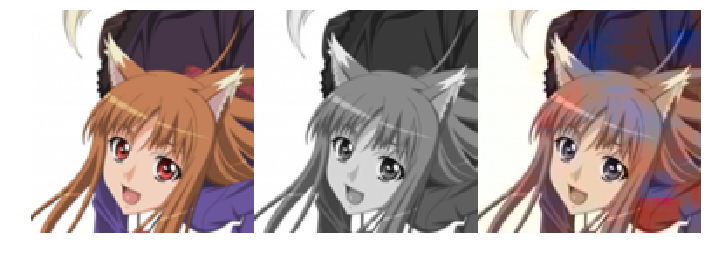

In [20]:
image_valid = plt.imread('C:/Users/dabsdamoon/Desktop/Neowiz Project/education/anime_face/horo_valid.png')
visualize_validation_image(image_valid, model, image_size = (size_row, size_col))